In [1]:
from crowd_dynamics.social_force_njit import SocialForceNJIT
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
n_pedestrians=250
SF = SocialForceNJIT(n_pedestrians)
SF.Ab = 20
#SF.A1 = 1
#SF.B1 = 10
#SF.B2 = 0.3

In [3]:
p0 = np.empty((n_pedestrians,2))
p0[:n_pedestrians//2,0] = SF.rng.uniform(-100, -10, size=n_pedestrians//2)
p0[n_pedestrians//2:,0] = SF.rng.uniform(10,100,size=n_pedestrians//2)
p0[:,1] = SF.rng.uniform(-2.7,2.7,size=n_pedestrians)
v0 = np.zeros_like(p0)
#v0[:,0] = 1.34
#v0[:,0] = -1.34
destinations = np.zeros((n_pedestrians,2,2))
destinations[:,0,0] = 0
destinations[:n_pedestrians//2,1,0] = 100000
destinations[n_pedestrians//2:,1,0] = -100000
destinations_range = np.ones((n_pedestrians,2,1))
n_pedestrians = p0.shape[0]

In [4]:
boundaries = np.array([[[-150,3], [150,3]], [[-150, -3], [150,-3]], [[0,3],[0,1]], [[0,-3],[0,-1]]])
SF.set_boundaries(boundaries)

In [5]:
SF.init_pedestrians(p0, destinations, velocities=v0, destinations_range=destinations_range)

In [6]:
SF.init_solver(t_bound=100)#, max_step=0.01)
i=0

0


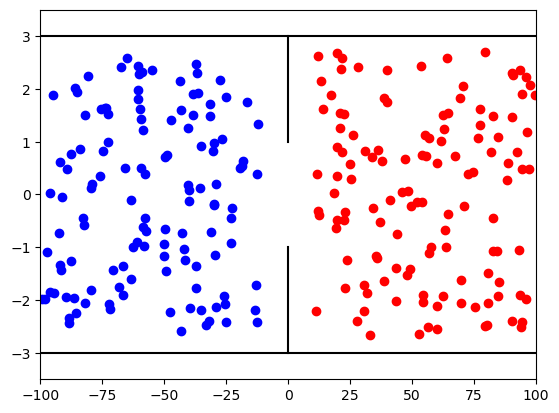

In [7]:
print(i)
plt.clf()
for _, boundary in enumerate(boundaries):
    plt.plot(boundary[:,0], boundary[:,1], color='k')
# Plot all positions up to this step for this pedestrian
for j in range(n_pedestrians):

    plt.scatter(SF.positions[j, 0], SF.positions[j, 1], color='b' if j < n_pedestrians/2 else 'r')
    plt.xlim(-100,100)
    plt.ylim(-3.5,3.5)

In [8]:
all_positions = []
all_velocities = []
all_desired_speeds = []
all_desired_directions = []
all_total_forces = []
all_repulsive_forces = []
all_driving_forces = []
all_times = []

0 0.0
100 21.854273145200114
200 29.132023786447622
300 34.82805252980185
400 41.62009908374555
500 46.7961123816314
600 51.241560315342205
700 56.82604655827914
800 62.388715349562304
900 67.62867682727622
1000 73.83638543620809
1100 78.99295680643598
1200 83.9710900164887
1300 88.57075038429275
1400 93.87868079766537
1495


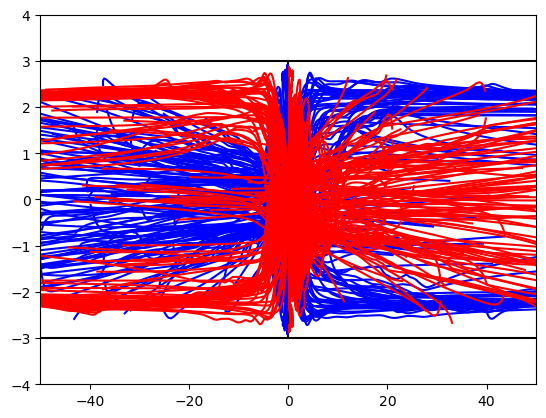

In [9]:
while SF.t < 100 and SF.solver.status == 'running':
    if i%100 == 0:
        print(i, SF.t)
    SF.step()
    all_positions.append(SF.positions)
#    all_velocities.append(SF.velocities)
#    all_desired_speeds.append(SF.desired_speeds)
#    destinations = SF.destinations[np.arange(n_pedestrians),SF.destinations_indices]
#    desired_directions = destinations - SF.positions
#    desired_directions_norm = np.linalg.norm(desired_directions, axis=1, keepdims=True)
#    desired_directions = np.divide(desired_directions, desired_directions_norm,
#                                   out=np.zeros_like(desired_directions), where=(desired_directions_norm!=0))
#    all_desired_directions.append(desired_directions)
#    all_total_forces.append(SF.total_force(SF.positions, destinations, SF.radii, SF.desired_speeds, SF.velocities))
#    all_repulsive_forces.append(SF.repulsive_force(SF.positions, SF.radii, SF.velocities, SF.anisotropic_character, SF.Verlet_sphere, SF.A1, SF.B1, SF.A2, SF.B2))
#    all_driving_forces.append(SF.driving_force(SF.velocities, desired_directions, SF.desired_speeds))
#    all_times.append(SF.t)
    i+=1
print(i)
#plt.clf()
for _, boundary in enumerate(boundaries):
    plt.plot(boundary[:,0], boundary[:,1], color='k')
# Plot all positions up to this step for this pedestrian
for j in range(n_pedestrians):
    plt.plot(np.array(all_positions)[:,j, 0], np.array(all_positions)[:,j, 1], color='b' if j < n_pedestrians/2 else 'r')
    plt.xlim(-50,50)
    plt.ylim(-4,4)

In [10]:
len(all_positions)

1495

In [11]:
j = 0
for i in range(1000):
    j += 1